# 4.3 - Dask

![dask](images/dask.png)


$$$$

[Dask](https://dask.org/) es un proyecto de código abierto que permite a los desarrolladores crear su software en coordinación con scikit-learn , pandas y NumPy. Es una herramienta muy versátil que funciona con una amplia gama de cargas de trabajo.

Esta herramienta incluye dos partes importantes; programación dinámica de tareas y recopilación de big data. La parte anterior es muy similar a Luigi , Celery y Airflow , con la excepción de que está optimizada específicamente para cargas de trabajo computacionales interactivas.

La última parte incluye marcos de datos, matrices paralelas y listas extendidas a interfaces populares como pandas y NumPy. De hecho, el Sr. Matthew Rocklin, creador de Dask, confirma que Dask se creó originalmente para paralelizar pandas y NumPy, aunque ahora ofrece muchos más beneficios que un sistema paralelo genérico. Los marcos de datos de Dask son ideales para escalar los flujos de trabajo de pandas y habilitar aplicaciones para series de tiempo. Además, la matriz Dask ofrece análisis de datos multidimensionales para aplicaciones biomédicas, así como algoritmos de aprendizaje automático.

La característica mágica es que esta herramienta requiere cambios mínimos de código y además se ejecuta en clústeres de forma resistente. Además, puede ejecutar este código en paralelo mientras procesa datos, lo que simplemente se traduce en menos tiempo de ejecución, menos tiempo de espera.

El dataframe de Dask comprende marcos de datos de pandas más pequeños, por lo que permite subconjuntos de sintaxis de consulta de pandas. Además es totalmente capaz de programar, construir e incluso optimizar cálculos computacionales complejos en gráficos. Esta es la razón por la que las empresas que operan en cientos de terabytes pueden optar por esta herramienta como opción de acceso.

Dask también le permite crear canalizaciones para matrices de datos, que luego se pueden transferir a los recursos informáticos relevantes. Con todo, esta herramienta es mucho más que una versión paralela de pandas.

$$$$

![dask_process](images/dask_process.png)

$$$$

In [ ]:
%pip install "dask[complete]"
%pip install dask_ml

**Cargando varios archivos**

In [1]:
import dask
import dask.dataframe as dd

In [2]:
df=dd.read_csv('../data/accounts.*.csv')

df.head()

,id,names,amount
0,23,Ursula,1380
1,92,Tim,-178
2,239,Alice,-784
3,260,Michael,-249
4,314,Jerry,1299


In [3]:
df.tail()

,id,names,amount
999995,324,Ray,2152
999996,314,Jerry,1116
999997,459,Dan,1647
999998,29,Edith,21
999999,395,Jerry,454


In [4]:
df.shape

(Delayed('int-88107c3b-c29d-4fe5-98d9-0b464f0e513a'), 3)

### Ejemplo aeropuertos

In [5]:
df=dd.read_csv('../data/nycflights/*.csv')

df.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,Diverted
0,1990,1,1,1,1621.0,1540,1747.0,1701,US,33,...,NaN,46.0,41.0,EWR,PIT,319.0,NaN,NaN,0,0
1,1990,1,2,2,1547.0,1540,1700.0,1701,US,33,...,NaN,-1.0,7.0,EWR,PIT,319.0,NaN,NaN,0,0
2,1990,1,3,3,1546.0,1540,1710.0,1701,US,33,...,NaN,9.0,6.0,EWR,PIT,319.0,NaN,NaN,0,0
3,1990,1,4,4,1542.0,1540,1710.0,1701,US,33,...,NaN,9.0,2.0,EWR,PIT,319.0,NaN,NaN,0,0
4,1990,1,5,5,1549.0,1540,1706.0,1701,US,33,...,NaN,5.0,9.0,EWR,PIT,319.0,NaN,NaN,0,0


In [6]:
df.tail()

ValueError: Mismatched dtypes found in `pd.read_csv`/`pd.read_table`.

+----------------+---------+----------+
| Column         | Found   | Expected |
+----------------+---------+----------+
| CRSElapsedTime | float64 | int64    |
| TailNum        | object  | float64  |
+----------------+---------+----------+

The following columns also raised exceptions on conversion:

- TailNum
  ValueError("could not convert string to float: 'N54711'")

Usually this is due to dask's dtype inference failing, and
*may* be fixed by specifying dtypes manually by adding:

dtype={'CRSElapsedTime': 'float64',
       'TailNum': 'object'}

to the call to `read_csv`/`read_table`.

In [7]:
df=dd.read_csv('../data/nycflights/*.csv',
               
               dtype={'TailNum': str, 
                      'CRSElapsedTime': float, 
                      'Cancelled': bool})

df.tail()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,Diverted
269176,1999,12,27,1,1645.0,1645,1830.0,1901,UA,1753,...,205.0,-31.0,0.0,LGA,DEN,1619.0,7.0,13.0,False,0
269177,1999,12,28,2,1726.0,1645,1928.0,1901,UA,1753,...,214.0,27.0,41.0,LGA,DEN,1619.0,5.0,23.0,False,0
269178,1999,12,29,3,1646.0,1645,1846.0,1901,UA,1753,...,220.0,-15.0,1.0,LGA,DEN,1619.0,5.0,15.0,False,0
269179,1999,12,30,4,1651.0,1645,1908.0,1901,UA,1753,...,233.0,7.0,6.0,LGA,DEN,1619.0,5.0,19.0,False,0
269180,1999,12,31,5,1642.0,1645,1851.0,1901,UA,1753,...,232.0,-10.0,-3.0,LGA,DEN,1619.0,6.0,11.0,False,0


In [8]:
df.info(memory_usage='deep')

<class 'dask.dataframe.core.DataFrame'>
Columns: 23 entries, Year to Diverted
dtypes: object(4), bool(1), float64(10), int64(8)
memory usage: 440.9 MB


In [9]:
df.shape

(Delayed('int-20e15af9-8e21-4a4c-aebd-98742ea2b036'), 23)

In [10]:
len(df)

2611892

In [11]:
df

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,Diverted
npartitions=10,,,,,,,,,,,,,,,,,,,,,,,
,int64,int64,int64,int64,float64,int64,float64,int64,object,int64,object,float64,float64,float64,float64,float64,object,object,float64,float64,float64,bool,int64
,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...


In [13]:
df.DepDelay.max().compute()

1435.0

In [ ]:
%pip install graphviz
#%pip install python-graphviz
#conda install python-graphviz

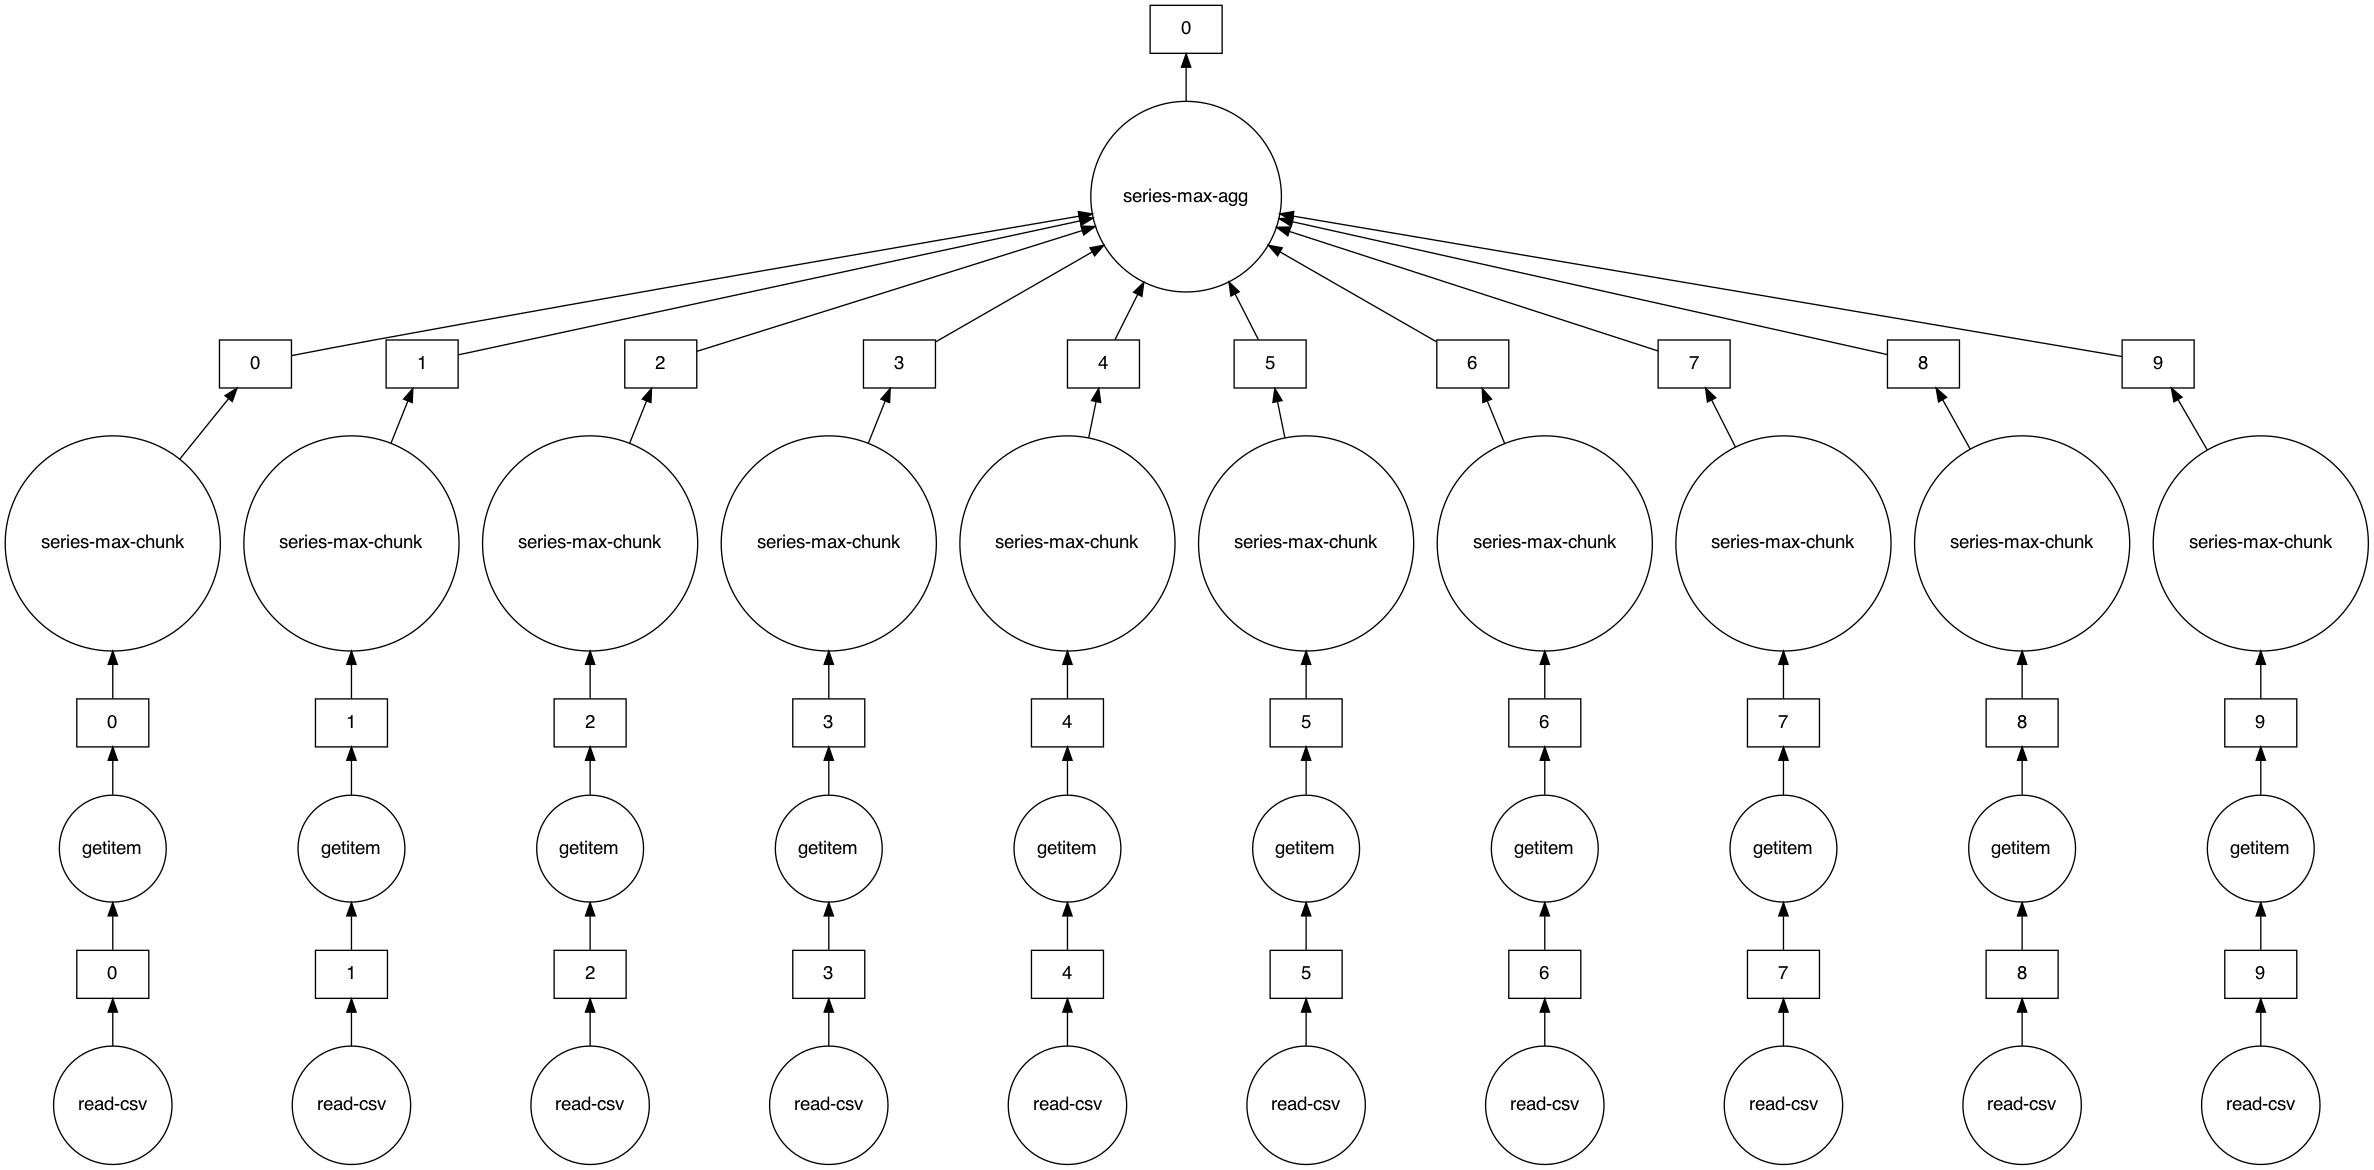

In [14]:
df.DepDelay.max().visualize(filename='images/max_dask.png')

In [17]:
df.groupby('Origin').DepDelay.mean().compute()

Origin
EWR    10.295469
JFK    10.351299
LGA     7.431142
Name: DepDelay, dtype: float64

In [18]:
%%time

len(df[~df.Cancelled])   # nº de vuelos NO cancelados

CPU times: user 2.87 s, sys: 629 ms, total: 3.5 s
Wall time: 1.24 s


2540961

In [19]:
no_cancelado = df[~df.Cancelled]

media_delay = no_cancelado.DepDelay.mean()

std_delay = no_cancelado.DepDelay.std()

In [20]:
std_delay

dd.Scalar<series-..., dtype=float64>

In [21]:
%time media_delay.compute()

CPU times: user 2.91 s, sys: 628 ms, total: 3.54 s
Wall time: 1.24 s


9.206602541321965

In [22]:
%time std_delay.compute()

CPU times: user 2.93 s, sys: 585 ms, total: 3.52 s
Wall time: 1.18 s


28.974539774551456

In [23]:
%time media_delay_res, std_delay_res = dask.compute(media_delay, std_delay)

CPU times: user 2.92 s, sys: 716 ms, total: 3.64 s
Wall time: 1.32 s


In [24]:
media_delay_res, std_delay_res

(9.206602541321965, 28.974539774551456)

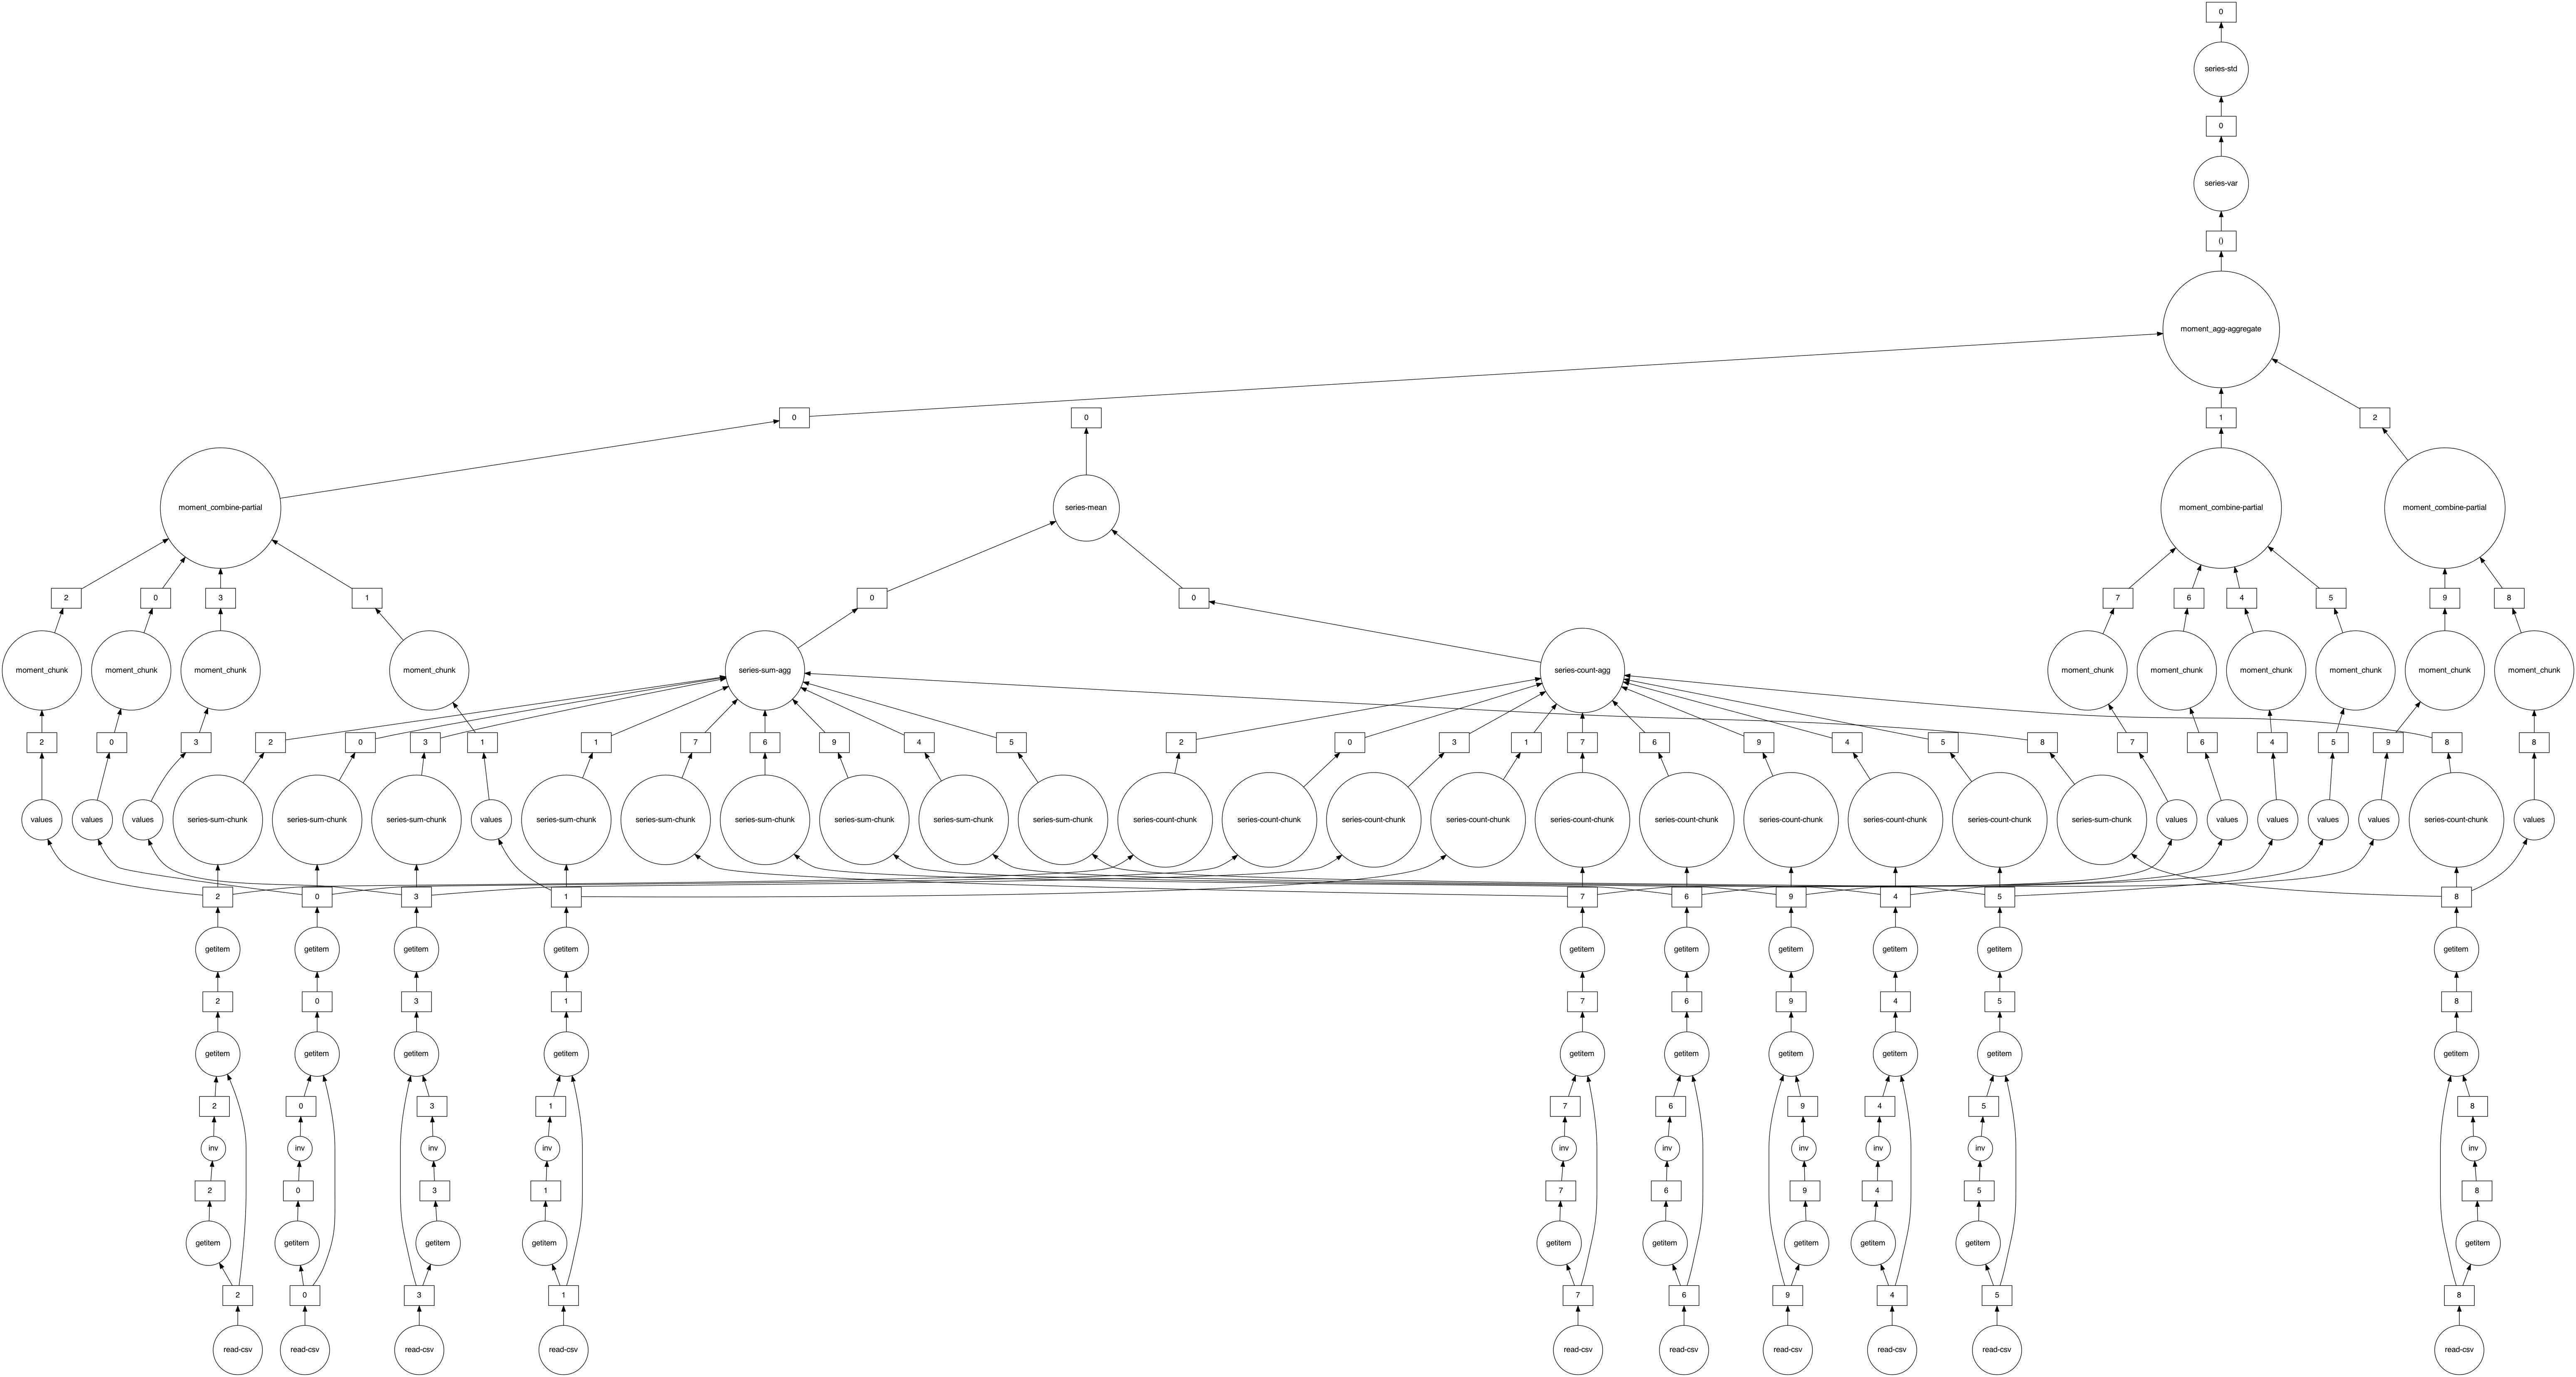

In [25]:
dask.visualize(media_delay, std_delay, filename='images/max_dask.png')

### Tip

El tipo de archivo cambia la forma de procesar y su velocidad. Usaremos archivos `.csv`, `.parquet` y `h5` o `hdfs`

In [26]:
import os

In [27]:
archivos=os.path.join('../data', 'accounts.*.csv')

archivos

'../data/accounts.*.csv'

In [28]:
%time df_csv=dd.read_csv(archivos)

df_csv.head()

CPU times: user 8.99 ms, sys: 11.1 ms, total: 20.1 ms
Wall time: 18.7 ms


,id,names,amount
0,23,Ursula,1380
1,92,Tim,-178
2,239,Alice,-784
3,260,Michael,-249
4,314,Jerry,1299


In [ ]:
%pip install tables
#conda install pytables

In [29]:
target=os.path.join('../data', 'accounts.h5')

target

'../data/accounts.h5'

In [30]:
%time df_csv.to_hdf(target, key='../data')

CPU times: user 1.66 s, sys: 344 ms, total: 2.01 s
Wall time: 2.45 s


['../data/accounts.h5', '../data/accounts.h5', '../data/accounts.h5']

In [31]:
%time df_hdf=dd.read_hdf(target, key='../data')

df_hdf.head()

CPU times: user 24.1 ms, sys: 6.12 ms, total: 30.3 ms
Wall time: 32.2 ms


,id,names,amount
0,23,Ursula,1380
1,92,Tim,-178
2,239,Alice,-784
3,260,Michael,-249
4,314,Jerry,1299


In [32]:
df_csv.info(memory_usage='deep')

<class 'dask.dataframe.core.DataFrame'>
Columns: 3 entries, id to amount
dtypes: object(1), int64(2)
memory usage: 68.7 MB


In [33]:
df_hdf.info(memory_usage='deep')

<class 'dask.dataframe.core.DataFrame'>
Columns: 3 entries, id to amount
dtypes: object(1), int64(2)
memory usage: 91.6 MB


In [34]:
%time df_csv.amount.sum().compute()

CPU times: user 255 ms, sys: 71.3 ms, total: 327 ms
Wall time: 133 ms


3101435607

In [35]:
%time df_hdf.amount.sum().compute()

CPU times: user 737 ms, sys: 79.1 ms, total: 816 ms
Wall time: 828 ms


3101435607

In [ ]:
# parquet
%pip install fastparquet

In [ ]:
%pip install pyarrow

In [36]:
target=os.path.join('../data', 'accounts.parquet')

df_csv.categorize(columns=['names']).to_parquet(target,
                                                storage_options={'has_nulls':True},
                                                engine='fastparquet')

In [37]:
%%time 

df_par=dd.read_parquet('../data/accounts.parquet', engine='pyarrow')

df_par.head()

CPU times: user 135 ms, sys: 58.4 ms, total: 193 ms
Wall time: 604 ms


,id,names,amount
0,23,Ursula,1380
1,92,Tim,-178
2,239,Alice,-784
3,260,Michael,-249
4,314,Jerry,1299


In [38]:
df_par.info(memory_usage='deep')

<class 'dask.dataframe.core.DataFrame'>
Columns: 3 entries, id to amount
dtypes: category(1), int64(2)
memory usage: 71.5 MB


In [39]:
%time df_csv.amount.sum().compute()

CPU times: user 251 ms, sys: 74.8 ms, total: 326 ms
Wall time: 141 ms


3101435607

In [40]:
%time df_hdf.amount.sum().compute()

CPU times: user 739 ms, sys: 88.2 ms, total: 827 ms
Wall time: 884 ms


3101435607

In [41]:
%time df_par.amount.sum().compute()

CPU times: user 60.2 ms, sys: 19.4 ms, total: 79.5 ms
Wall time: 39 ms


3101435607